#**Первый этап:** загрузка и предобработка данных.

Вместо ручной загрузки автоматизируем процесс для удобства. Правда, придётся пожертвовать приватностью репозитория на GitHub, но ничего страшного — мы открыты миру!

In [19]:
!pip install wget

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import wget

url = 'https://github.com/Sp-V1/Scientific-research-seminar-control-task/raw/main/TEH_World_Happiness_2015_2019_Imputed.csv'

filename = wget.download(url)

dataframe = pd.read_csv('TEH_World_Happiness_2015_2019_Imputed.csv')

dataframe

,Country,Happiness rank,Happiness Score,GDP per capita,Social support,Healthy life,Freedom,Generosity,Corruption,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015
...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,152,3.334,0.35900,0.71100,0.61400,0.55500,0.21700,0.41100,2019
778,Tanzania,153,3.231,0.47600,0.88500,0.49900,0.41700,0.27600,0.14700,2019
779,Afghanistan,154,3.203,0.35000,0.51700,0.36100,NaN,0.15800,0.02500,2019
780,Central African Republic,155,3.083,0.02600,NaN,0.10500,0.22500,0.23500,0.03500,2019


Данные загружены — переходим к предобработке.

In [21]:
print("Общее количество строк данных:", len(dataframe), '\n')

print("Количество строк данных с неполной информацией:", len(dataframe.dropna()), '\n')

print("Все ли значения неотрицательны:", (dataframe.drop(columns=['Country']).fillna(0) >= 0).all().all(), '\n')

print("Количество строк дубликатов:", len(dataframe) - len(dataframe.drop_duplicates()))

Общее количество строк данных: 782 

Количество строк данных с неполной информацией: 751 

Все ли значения неотрицательны: True 

Количество строк дубликатов: 0


Выходит, что наши данные достаточно чистые — лишь $\approx 3.96\%$ от имеющихся данных содержат пробелы — можем позволить себе исключить их из исследования.

In [22]:
upd_dataframe = dataframe.dropna()
del dataframe # Высвобождаем память

upd_dataframe

,Country,Happiness rank,Happiness Score,GDP per capita,Social support,Healthy life,Freedom,Generosity,Corruption,Year
0,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015
...,...,...,...,...,...,...,...,...,...,...
775,Malawi,150,3.410,0.19100,0.56000,0.49500,0.44300,0.21800,0.08900,2019
776,Yemen,151,3.380,0.28700,1.16300,0.46300,0.14300,0.10800,0.07700,2019
777,Rwanda,152,3.334,0.35900,0.71100,0.61400,0.55500,0.21700,0.41100,2019
778,Tanzania,153,3.231,0.47600,0.88500,0.49900,0.41700,0.27600,0.14700,2019


#**Второй этап:** разведочный анализ данных (EDA)

Поговорим об устройстве датафрейма, построим парные диаграммы, а также матрицу корреляции. Будем придерживаться заданной последовательности.

In [23]:
print(list(upd_dataframe))

['Country', 'Happiness rank', 'Happiness Score', 'GDP per capita', 'Social support', 'Healthy life', 'Freedom', 'Generosity', 'Corruption', 'Year']


Рассмотрим колонки избранного датафрейма:

- Столбцы "Country" и "Year" — непосредственно страна и год проведения опроса.

- Колонка "Happiness rank" — место, присвоенное стране в рейтинге счастья граждан различных государств по итогам набранных баллов в столбце "Happiness Score".

- Колонка "Happiness Score" — представляет собой сумму набранных баллов в следующих столбцах: "GDP per capita" (ВВП на душу населения), "Social support" (социальная поддержка или же семья, так как в оригинальном исследовании это "Family"), "Healthy life" (здоровье), "Freedom" (свобода), "Generosity" (щедрость), "Corruption" (коррупция), а также непредставленным в данном датафрейме "Dystopia + Residual" (Антиутопия и остаточные значения), что включает в себя "остаточные значения, или необъяснимые компоненты, различающиеся для каждой страны, отражая степень, в которой шесть переменных либо завышают, либо занижают средние оценки продолжительности жизни за 2019-2021 годы. Эти остатки имеют среднее значение, близкое к нулю, по всей совокупности стран" и количество набранных баллов в оценке счастья выдуманной страны "Антиутопии", "значения которой равны самым низким в мире средним национальным показателям по каждому из шести факторов". Последнее не представляет для нас интереса, так как не воплащает в себе строго один из факторов, что лишает нас возможности делать хоть какие-либо выводы; к тому же, как уже упоминалось, наш датафрейм лишён этих данных.

Сами же вопросы, задаваемые корресподентами Gallup World Poll охватывали 14 тем, а именно: (1) бизнес и экономика, (2) вовлечение граждан, (3) коммуникации и технологии, (4) разнообразие (социальные вопросы), (5) образование и семьи, (6) эмоции (благополучие), (7) окружающая среда и энергетика, (8) еда и кров, (9) правительство и политика, (10) закон и порядок (безопасность), (11) здоровье, (12) религия и этика, (13) транспорт и (14) работа.

*Источник данных по вопросам из анкетирования: https://en.wikipedia.org/wiki/World_Happiness_Report#cite_note-21. Больше ифнормации на официальном сайте: https://news.gallup.com/poll/105226/world-poll-methodology.aspx.*

Для наглядности, нарисуем распределение 'Happiness Score'.

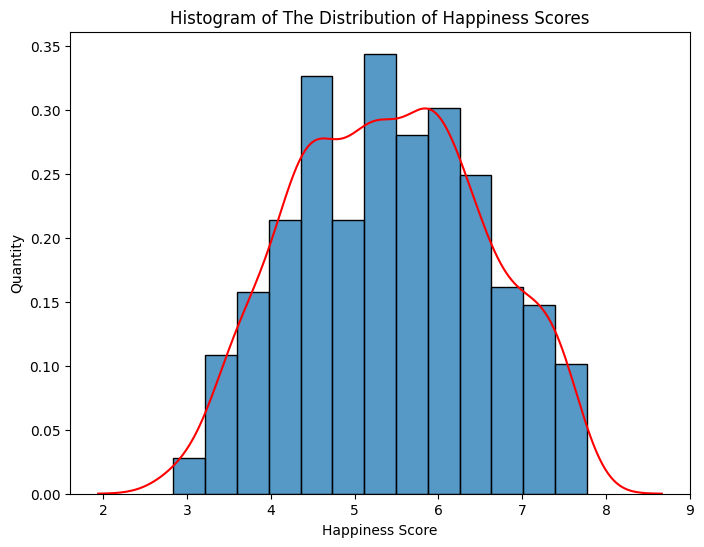

In [24]:
plt.figure(figsize=(8, 6))

sns.histplot(upd_dataframe['Happiness Score'], stat="density")

# Следующий график приблизительно покажет форму распределения набранных очков в оценке счастья:
sns.kdeplot(upd_dataframe['Happiness Score'], color='red')

plt.title('Histogram of The Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Quantity')
plt.show()

Перейдём к построению парных диаграмм и поиску зависимостей. Убираем из рассмотрения "Happiness rank", поскольку у нас уже есть "Happiness Score", что даёт нам больше информации, а также года проведения опросов — "Year", так как не является признаком/предиктором/регрессором (не учавствует в подсчёте "Happiness rank").

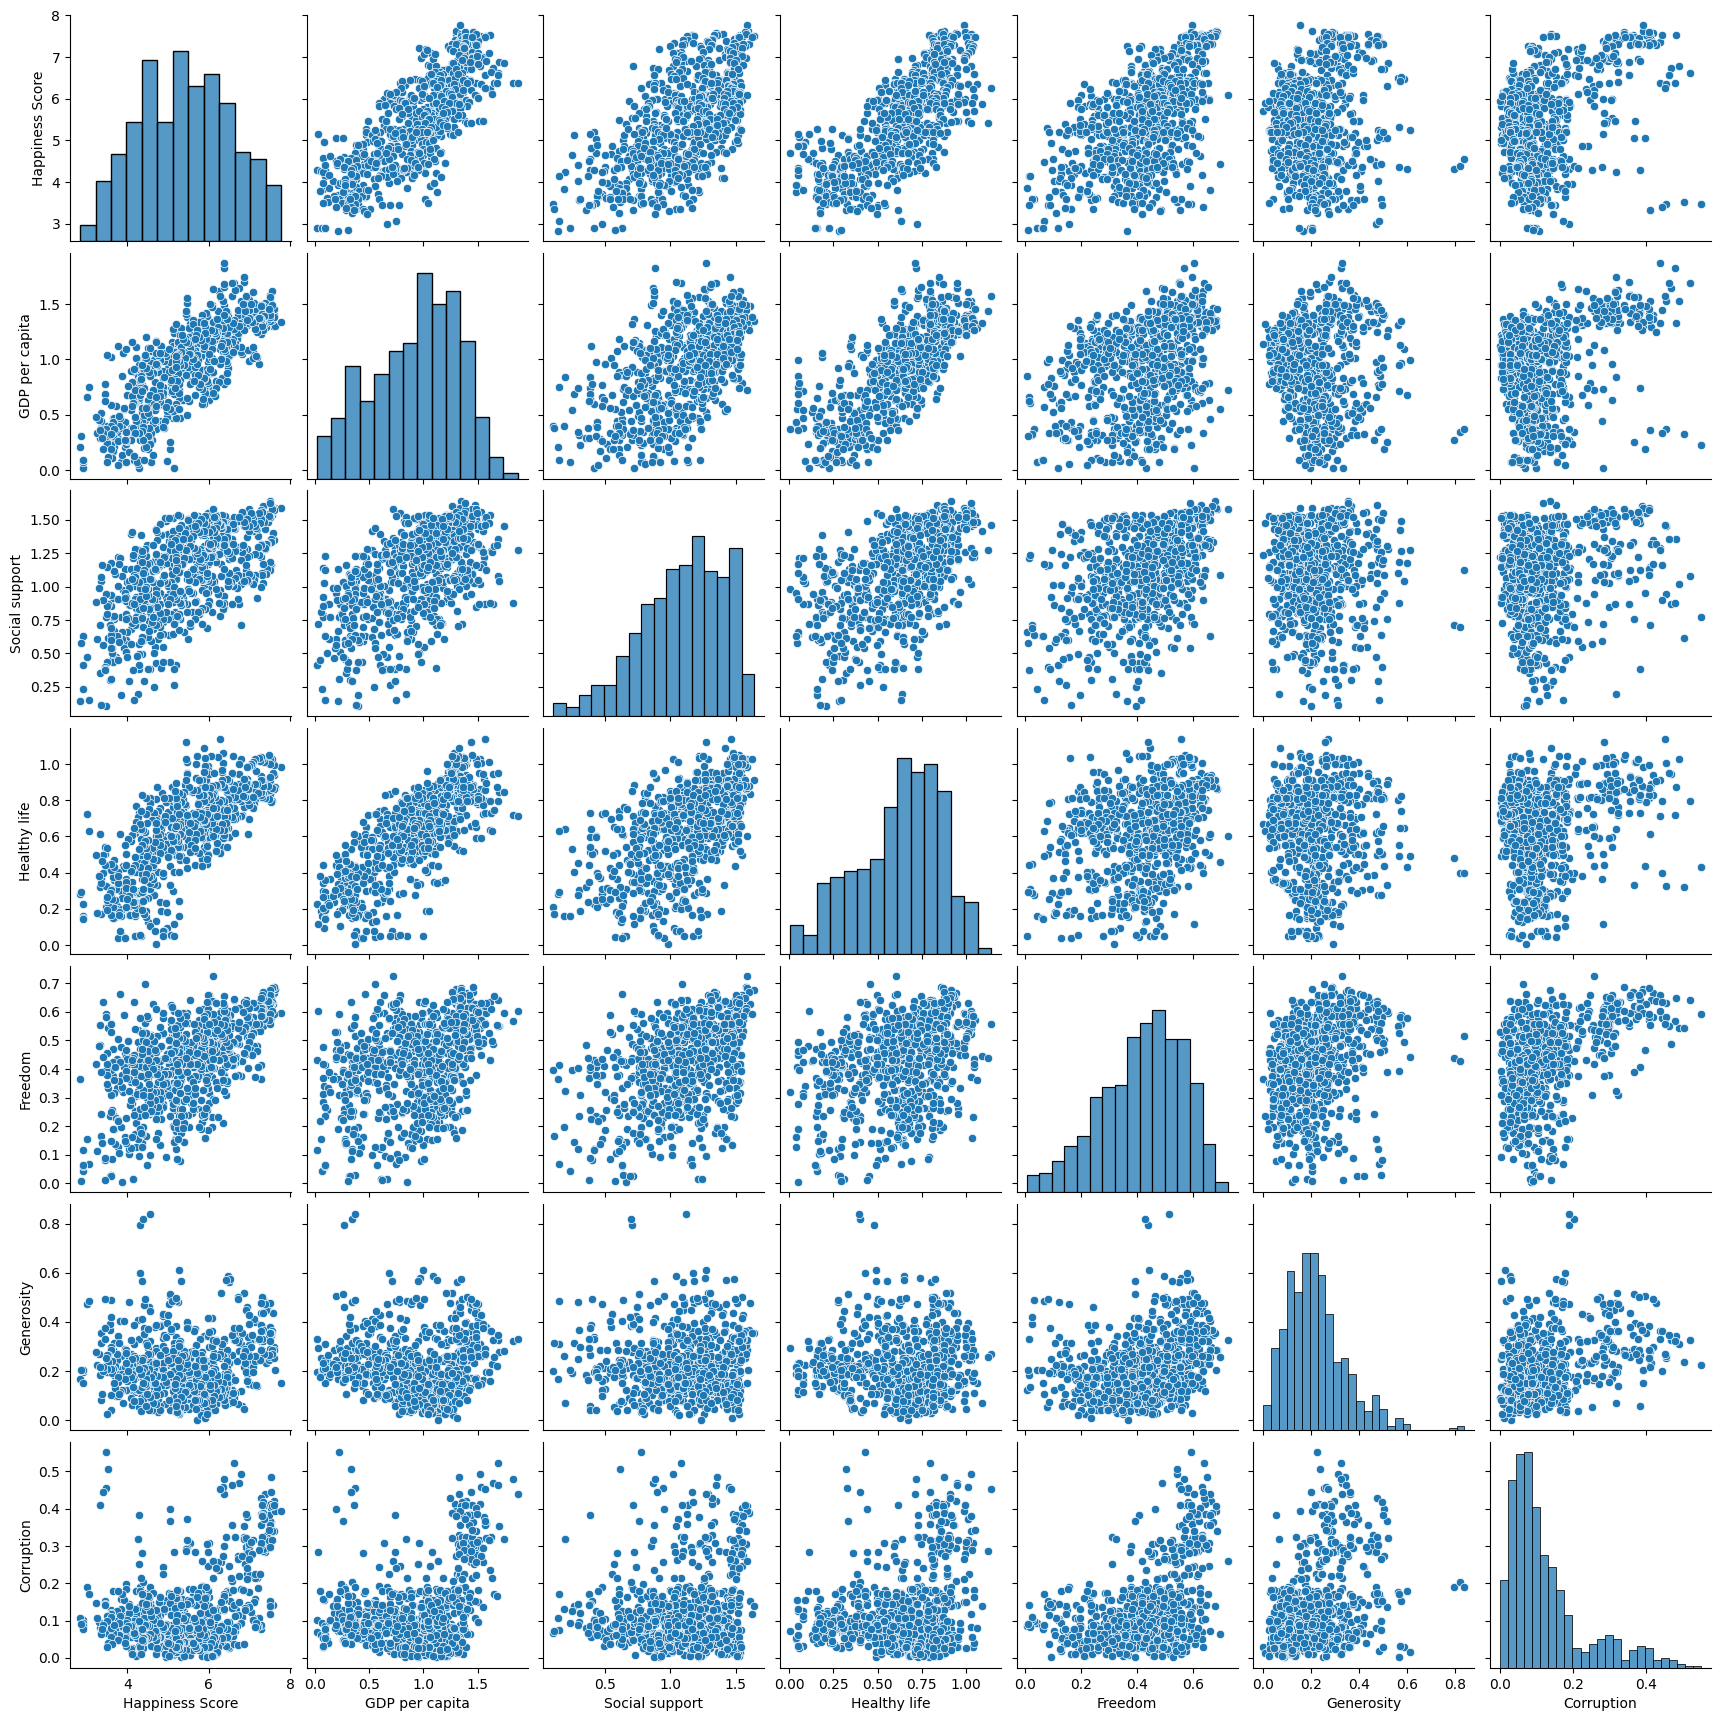

In [25]:
sns.pairplot(upd_dataframe.drop(columns=['Happiness rank', 'Year']))

Из графиков можно сделать следующие выводы:

- Наиболее чётко линейная зависимость, а именно положительная корреляция, для объясняемой переменной "Happiness Score" прослеживается с признаками "GDP per capita" и "Healthy life". Несколько хуже, но всё ещё достаточно хорошо виден подобный результат и для признака "Social support", а также "Freedom". Наконец, хуже всего положительная корреляция для объясняемой переменной наблюдается с "Generosity" и "Corruption".

- Отдельно стоит отметить, что также есть место для сильной положительной корреляции между признаками "GDP per capita" и "Healthy life", и менее выроженная между, но существенная между "GDP per capita" и "Social support".

Вывод из наших наблюдений представим ниже, после построения и сопостовления результатов с корреляционной матрицей (тепловой картой).

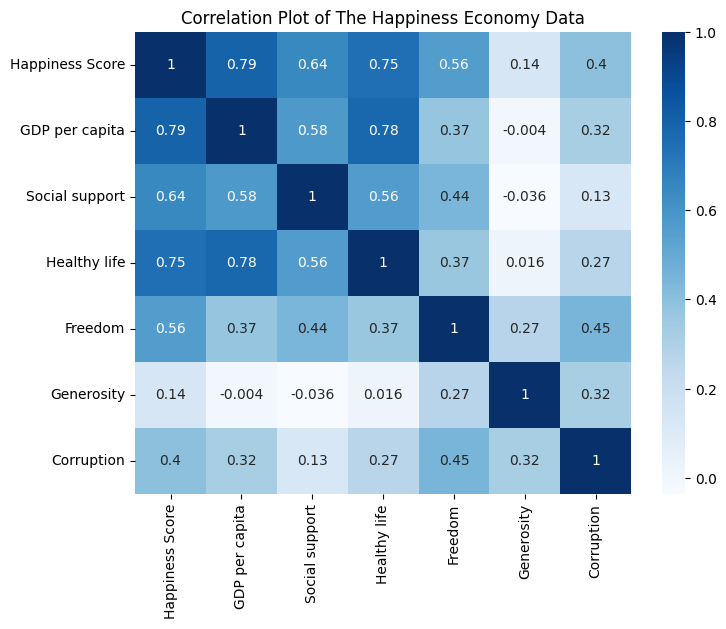

In [26]:
plt.figure(figsize=(8, 6))
sns.heatmap(upd_dataframe.drop(columns=['Country', 'Happiness rank', 'Year']).corr(),
            annot=True, cmap='Blues')
plt.title('Correlation Plot of The Happiness Economy Data')
plt.show()

Теперь мы явно можем убедиться в верности наших наблюдений. Выходит, что наиболее значимыми факторами для оценки счастья являются ВВП на душу населения и здоровье $(corr=0.79$ и $0.75$ соответсвенно$)$, следом идёт социальная поддержка $(corr=0.64)$, потом свобода $(corr=0.56)$, коррупция $(corr=0.4)$, а в самом конце списка со значительным отрывом от остальных показателей находятся щедрость $(corr=0.14)$. Более того, оказывается, что два самых значимых фактора имеют высокую положительную корреляцию $(0.78)$, что говорит о том, что часто улучшение положения первого ведёт к улучшению второго, и наоборот. Чуть менее выраженная, однако достаточная коллеряция $(>0.5)$ присутсвует и между ВВП на душу населения и социальной поддержкой, а также между здоровьем и социальной поддержкой, откуда делаем вывод, что первые три по значимости фактора тесно связаны между собой.

#**Третий этап:** задача регрессии, модели, результаты.

На этом шаге мы построим модель линейной регрессии, а также разберём получившиеся результаты.

### Модель линейной регрессии

Вспомним про устройство нашего датафрейма.

In [27]:
print(list(upd_dataframe))

['Country', 'Happiness rank', 'Happiness Score', 'GDP per capita', 'Social support', 'Healthy life', 'Freedom', 'Generosity', 'Corruption', 'Year']


Теперь переходим к первому шагу в построении линейной регресии — разбиению имеющихся данных на две выборки — обучающую и тестовую. Зададим их соотношение $80/20$ соответсвенно.

In [28]:
from sklearn.model_selection import train_test_split

# Задаём "объясняемую переменную" как значения столбца "Happiness Score":
y = upd_dataframe['Happiness Score']

# Аналогичное действие проводим и с признаками, то есть задаём регрессоры:
X = upd_dataframe.drop(columns=['Country', 'Happiness rank', 'Happiness Score', 'Year'])

# Проводим разбиение:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

Используя библиотеку scikit-learn, строим саму модель, далее проводим обучение на подготовленных данных и построим прогноз нашего рейтинга счастья на тестовых данных.

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Задаём модель линейной регрессии:
linear_regression = LinearRegression()

# Проводим обучение:
linear_regression.fit(X_train, y_train)

# Вычисляем предсказание для объясняемой переменной по тестовой выборке:
y_pred = linear_regression.predict(X_test)

Воспользуемся библиотекой statsmodels для получения сводки по модели.

In [30]:
import statsmodels.api as sm

# Добавляем константу к x_train, так как этого требует функция sm.OLS:
x_train = sm.add_constant(X_train)

# Проводим обучение:
model = sm.OLS(y_train, x_train).fit()

# Получаем сводку по модели:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness Score   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     315.4
Date:                Sat, 11 Nov 2023   Prob (F-statistic):          7.60e-181
Time:                        19:22:54   Log-Likelihood:                -496.68
No. Observations:                 600   AIC:                             1007.
Df Residuals:                     593   BIC:                             1038.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.0728      0.096     21.674      0.000       1.885       2.261
GDP per capita     1.1482      0.096     11.960      0.000       0.960       1.337
Social support     0.6980      0.097      7.172      0.000       0.507       0.889
Healthy life       1.0035      0.157      6.383      0.000       0.695       1.312
Freedom            1.5563      0.199      7.831      0.000       1.166       1.947
Generosity         0.6240      0.205      3.042      0.002       0.221       1.027
Corruption         0.7783      0.255      3.056      0.002       0.278       1.279
==============================================================================
Omnibus:                       10.813   Durbin-Watson:                   2.082
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.443
Skew:                          -0.272   Prob(JB):                      0.00327
Kurtosis:                       3.401   Cond. No.                         24.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Пусть некоторые обозначения и являются для нас загадкой, в силу недостаточности знаний, главным образом нас здесь интересуют коэффициенты — веса, которые получили наши регрессоры, а также коэффициент детерминации (R-squared) — доля дисперсии зависимой ("объясняемой") переменной, которую модели удалось объяснить.

Наш коэффициент детерминации оказался равен $0.761$, что говорит о том, что наша модель достаточно хорошо объясняет изменчивость нашей зависимой переменной.

Помимо этого, выяснилось, что фактор "Freedom" с заданными значениями в модели вносит больший вклад, чем представлено в изначальном датасете в $\approx 1.556$ раза, что является наибольшим весом из всех, не считая константы, равной $\approx 2.073$. Следом идёт "GDP per capita" с весом в $\approx 1.148$ и "Healthy life" со значением в $\approx 1.004$. Остальные же регрессоры имеют веса со значением меньше единицы.

Давайте попытаемся дать комментарий происходящему. Во-первых, почему такая большая константа? Казалось бы, ведь оценки счастья не превышают $7.769$, но константа $\approx 2.073$. На самом деле это объяснить довольно легко — вспомним, как утроена оценка счастья и наш дадафрейм — в подсчёт баллов входит и очки так называемого параметра "Dystopia + Residual", который включает в себя остаток по другим признакам, а также оценку, положенную нашей Антиутопии, что равна $1.85$. А среднее по параметру "Dystopia + Residual" как раз и является $2$. Покажем это:

In [31]:
print("Средняя разница между суммой баллов по данным категориям и оценкой счастья:",
 (upd_dataframe['Happiness Score'] - upd_dataframe.drop(columns=['Country', 'Happiness rank', 'Happiness Score', 'Year']).sum(axis=1)).mean())

Средняя разница между суммой баллов по данным категориям и оценкой счастья: 2.007176782122503


Бинго! Выходит, что с константой разобрались.

Второй наш вопрос посвящён столь большому приросту в весе у "Freedom" и падению у "Social support". С остальными низкими значениями ("Generosity", "Corruption") достаточно легко разобраться — мы уже выяснили, что они не так хорошо коррелируют с общей оценкой счастья. Но что случилось с, например, "Social support"? Ответом может служить мультиколлинеарность, которая была открыта нами ранее, между тремя тремя факторами с наибольшей положительной корреляцией по отношению к общей оценке счастья — они слишком сильно привязаны друг к другу (имеют большую положительную корреляцию), и часть веса из "Social support" перешла к "GDP per capita" $(\approx 1.148)$ и "Healthy life" $(\approx 1.004)$, оставив "Social support" с $\approx 0.698$.

Наконец, остался регрессор "Freedom" с весом в $\approx 1.556$. Здесь нам тоже поможет корреляция — вспомним, что корреляция у "Freedom" с общей оценкой счастья была $0.56$, в то время как у "Corruption" и "Generosity" $0.4$ и $0.14$ соответсвенно. Другими словами, два последних фактора оказались наименее статистически значимыми и их вес перешёл к "Freedom", что имеет большую значимость для определения общей оценки счастья. Вес не перешёл к другим признакам, так как те и так мультиколлинеарны.

Осталось рассмотреть среднеквадратическую и среднюю абсолютную ошибки.

In [32]:
print("Среднеквадратическая ошибка:", mean_squared_error(y_test, y_pred), '\n')

print("Средняя абсолютная ошибка:", mean_absolute_error(y_test, y_pred))

Среднеквадратическая ошибка: 0.27216171575019327 

Средняя абсолютная ошибка: 0.40840279523729434


Для наших данных, где значения оценки счастья не превышают $7.769$ и при этом являются положительными, мы имеем весьма хороший результат — для среднеквадратической ошибки получаем $\approx 0.272$, а для средней абсолютной ошибки $\approx 0.408$, что действительно мало. Обратим внимание, что среднеквадратичная ошибка получилась меньше средней абсолютной, но это результат того, что наши ошибки, по-видимому, в большинстве своём были меньше единицы, а значит возведение в квадрат в формуле среднеквадратичной ошибки лишь уменьшало значение ошибки — в этом и кроется разгадка.

### Модель **XXX**

*~Loading...*